# **Daltix Data Analyst Challenge**
In this challenge you will explore a subset of data that mirrors (in a simplified manner) some of the data we work with at Daltix.  
The goal of this challenge is to explore the data we provide and share all insights you find relevant in a business-friendly manner.
  
Some tips:
* Imagine you are presenting these to both technical and non-technical members of your company. 
* Take into consideration that the code you produce should be readable and reusable by a colleague in the future.


**Good luck**! 😀

> The Daltix Team
______________

### The Challenge starts here

In [1]:
# Importing Libraries
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

from datetime import datetime

______________
## 1. Extract the data
**Description**

In this section you will focus on importing the files from the dataset that was provided and do a simple QA of the data.
  
After completing it you should be have all 4 tables locally available.

_Question:_
* Did you notice any quality issues with the files we provided? If so, can you list them? How did you deal with them? 

 **Yes, I noticed that product and category files have quality issues.**

 **Product data had ean and content field the information was inside the dictionary**

 **Category field the information was inside the dictionary**
 
 **Price had NaN values that were removed**
 
 **To handle all this issues I used some build in functions,regex and logic. This way was possible extract the information.**


In [235]:
# Importing files
url_product  = 'https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/product.csv'
url_price    = 'https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/price.csv'
url_category = 'https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/category.csv'
url_promo    = 'https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/promo.csv'

In [3]:
product  = pd.read_csv(url_product,sep=",")
price    = pd.read_csv(url_price,sep=",")
category = pd.read_csv(url_category,sep="|")
promo    = pd.read_csv(url_promo,sep=",")

In [5]:
# Exploring product
product.head()

,daltix_id,product_id,article_nr,shop,country,name,brand,eans,contents
0,001b94cf378a9827f698393795988539bdc1909a70674d...,832766,2474959.0,shop4,be,Nivea sun SOS Aftersun herstel. 200ml,Nivea sun,NaN,"{\n ""approximate_content"": ""false"",\n ""conte..."
1,002c30e9451e4f42283545ba979ac8a7f807668e85c55a...,3263396,158087.0,shop3,be,BRABANTIA Tasty ijsschep munt,BRABANTIA,NaN,"{\n ""content_value"": ""NaN""\n}"
2,005d13004d634e1eb2e384239d0f328bc8ec445556b6c6...,10763,3816367.0,shop4,be,Boerinneke hagelslag suikervrij 200g,Boerinneke,"[\n ""05411146223898""\n]","{\n ""approximate_content"": ""false"",\n ""conte..."
3,005eb33441fd41c81ba3bced9ab90e48b71fafcfe18f0e...,6479,NaN,shop1,nl,Slips of strings,NaN,NaN,"{\n ""approximate_content"": ""false"",\n ""conte..."
4,00622df3e2f6236a5f09e44b400acaaaec363f699d1ef4...,4024160,5287.0,shop3,be,BONI Torpedo RaketStarship,BONI,"[\n ""05400141240870""\n]","{\n ""approximate_content"": ""false"",\n ""conte..."


In [6]:
# Checking product info
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4233 entries, 0 to 4232
Data columns (total 9 columns):
daltix_id     4233 non-null object
product_id    4233 non-null object
article_nr    2201 non-null float64
shop          4233 non-null object
country       4233 non-null object
name          4233 non-null object
brand         2810 non-null object
eans          1635 non-null object
contents      4233 non-null object
dtypes: float64(1), object(8)
memory usage: 297.7+ KB


In [4]:
# Cleansing eans
eans_new = product["eans"].str.split("\n",n=3,expand=True)

# Cleansing 1º non-null columnn from eans_new
eans_new_2 = eans_new[1].str.split('"',n=2,expand=True)

# 1º columnn cleansed
eans_new_3 = eans_new_2[1]

# Cleansing 2º non-null columnn from eans_new
eans_new_4 = eans_new[2].str.split('"',n=2,expand=True)

# 2º columnn cleansed
eans_new_5 = eans_new_4[1]

# Create new columns in data frame with cleansed eans
product["ean_clean"] = eans_new_3
product["ean_clean_2"] = eans_new_5

# Dropping old eans name
product_clean = product
product_clean.drop(columns=["eans"], inplace=True)

In [5]:
# Cleansing contents
contents_new = product["contents"].str.split("\n",n=-1,expand=True)

# Cleansing 1º non-null columnn from contents_new
contents_new_2 = contents_new[1].str.split('"',n=-1,expand=True)
contents_new_2[3].replace("false",np.nan,inplace=True)
contents_new_2.fillna(value=pd.np.nan,inplace=True)
contents_new_2.replace(r'^\s*$', np.nan, regex=True,inplace=True)
contents_new_2_final = contents_new_2[[1,3]]
contents_new_2_final.columns = ['content_2','value_2']
contents_new_2_final_2 = contents_new_2_final.fillna("")
contents_clean_2 = contents_new_2_final_2['content_2'] + ':' +contents_new_2_final_2['value_2']
contents_clean_2.replace(to_replace=":",value="",inplace=True)


# Cleansing 2º non-null columnn from contents_new
contents_new_3 = contents_new[2].str.split('"',n=-1,expand=True)
contents_new_3.fillna(value=pd.np.nan,inplace=True)
contents_new_3[2].replace(to_replace="\D",value="",regex=True,inplace=True)
contents_new_3.replace(r'^\s*$', np.nan, regex=True,inplace=True)
contents_new_3["final"] = np.where(contents_new_3[2].notna(),contents_new_3[2],contents_new_3[3])
contents_new_3_final = contents_new_3[[1,'final']]
contents_new_3_final.columns = ['content_3','value_3']
contents_new_3_final_2 = contents_new_3_final.fillna("")
contents_clean_3 = contents_new_3_final_2['content_3'] + ':' +contents_new_3_final_2['value_3']
contents_clean_3.replace(to_replace=":",value="",inplace=True)

# Cleansing 3º non-null columnn from contents_new
contents_new_4 = contents_new[3].str.split('"',n=-1,expand=True)
contents_new_4[2].replace(to_replace="\D",value="",regex=True,inplace=True)
contents_new_4.fillna(value=pd.np.nan,inplace=True)
contents_new_4_final = contents_new_4[[1,2]]
contents_new_4_final.columns = ['content_4','value_4']
contents_new_4_final_2 = contents_new_4_final.fillna("")
contents_clean_4 = contents_new_4_final_2['content_4'] + ':' +contents_new_4_final_2['value_4']
contents_clean_4.replace(to_replace=":",value="",inplace=True)

# Create new columns in data frame with cleansed contents
product['contents_clean']   = contents_clean_2
product['contents_clean_2'] = contents_clean_3
product['contents_clean_3'] = contents_clean_4

# Dropping old contents name
product_clean = product
product_clean.drop(columns=["contents"], inplace=True)

In [6]:
# Check final product table 
product_clean.head()

,daltix_id,product_id,article_nr,shop,country,name,brand,ean_clean,ean_clean_2,contents_clean,contents_clean_2,contents_clean_3
0,001b94cf378a9827f698393795988539bdc1909a70674d...,832766,2474959.0,shop4,be,Nivea sun SOS Aftersun herstel. 200ml,Nivea sun,NaN,NaN,approximate_content:,content_unit:ml,content_value:200
1,002c30e9451e4f42283545ba979ac8a7f807668e85c55a...,3263396,158087.0,shop3,be,BRABANTIA Tasty ijsschep munt,BRABANTIA,NaN,NaN,content_value:NaN,,
2,005d13004d634e1eb2e384239d0f328bc8ec445556b6c6...,10763,3816367.0,shop4,be,Boerinneke hagelslag suikervrij 200g,Boerinneke,05411146223898,None,approximate_content:,content_unit:g,content_value:200
3,005eb33441fd41c81ba3bced9ab90e48b71fafcfe18f0e...,6479,NaN,shop1,nl,Slips of strings,NaN,NaN,NaN,approximate_content:,content_unit:pack,content_value:2
4,00622df3e2f6236a5f09e44b400acaaaec363f699d1ef4...,4024160,5287.0,shop3,be,BONI Torpedo RaketStarship,BONI,05400141240870,None,approximate_content:,content_unit:ml,content_value:600


In [7]:
# Exploring Price
price.head()

,daltix_id,shop,country,product_id,location,price,unit_std,date
0,0000ba625520cd774f3fc738e27d9d2beb795995c99c38...,shop4,be,888810,ans,14.99,su,2019-10-09
1,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-08-07
2,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,1.75,su,2019-10-07
3,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ans,7.00,kg,2019-10-03
4,00029d74a62169da3141e55c31751ef071b9e39c54329e...,shop3,be,14933,ledeberg,6.84,kg,2019-08-10


In [11]:
# Checking price info
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250549 entries, 0 to 8250548
Data columns (total 8 columns):
daltix_id     object
shop          object
country       object
product_id    object
location      object
price         float64
unit_std      object
date          object
dtypes: float64(1), object(7)
memory usage: 503.6+ MB


In [25]:
# Removing NaN values
price = price[np.isfinite(price["price"])]

In [26]:
# Checking price info after remove NaN values
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8248489 entries, 0 to 8250548
Data columns (total 8 columns):
daltix_id     object
shop          object
country       object
product_id    object
location      object
price         float64
unit_std      object
date          object
dtypes: float64(1), object(7)
memory usage: 566.4+ MB


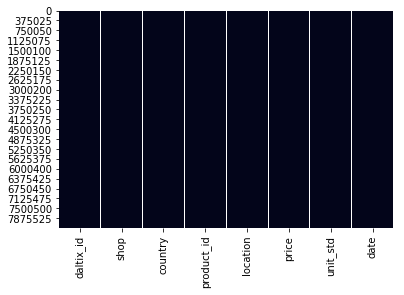

In [21]:
#Checking null values since data it seems consistent
sns.heatmap(price.isnull(), cbar=False)

In [27]:
# Setting date in the correct format
price["date_2"] = pd.to_datetime(price["date"],format = '%Y-%m-%d')

In [28]:
## Exploring category
category.head()

,shop,country,daltix_id,categories
0,shop4,be,21da5385ea831537d7c7b5b298f2d7eefbb2ec81413adb...,"[\n [\n ""Groenten en fruit"",\n ""Verse g..."
1,shop1,nl,1095d3a2e7aca5753a104d5d3c1106d0333f20d565f418...,"[\n [\n ""Onze aanbiedingen"",\n ""Weekact..."
2,shop1,nl,70b4b5051757b3dc4f91463736c6636dcdb9bc02bd262b...,"[\n [\n ""Onze aanbiedingen"",\n ""Aanbied..."
3,shop1,nl,55e5629d4fe138d2449d6f39a2b61f0b32d52493decb7e...,"[\n [\n ""Onze aanbiedingen"",\n ""Weekend..."
4,shop4,be,1ca5dc935e07f0d85c37f4e0b2e6d61611868d447ece87...,"[\n [\n ""Lichaamsverzorging/Parfumerie"",\n..."


In [30]:
# Checking category info
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 4 columns):
shop          3368 non-null object
country       3368 non-null object
daltix_id     3368 non-null object
categories    3368 non-null object
dtypes: object(4)
memory usage: 105.3+ KB


In [31]:
# Cleansing category
category_new = category["categories"].str.split("\n",n=-1,expand=True)

# Cleansing 1º non-null columnn from category_new
category_new_2= category_new[2].str.split('"',n=-1,expand=True)
category_new_2 = category_new[2].str.split('"',n=-1,expand=True)
category_new_2 = category_new_2[1].str.split('/',n=-1,expand=True)
category_new_2.columns = ["category_clean","category_clean_2","category_clean_3","category_clean_4"]

# Create new columns in data frame with cleansed contents
category['category_clean'] = category_new_2["category_clean"]
category['category_clean_2'] = category_new_2["category_clean_2"]
category['category_clean_3'] = category_new_2["category_clean_3"]
category['category_clean_4'] = category_new_2["category_clean_4"]


category_clean = category
category_clean.drop(columns=["categories"],inplace=True)

In [32]:
# Check final category table 
category_clean.head()

,shop,country,daltix_id,category_clean,category_clean_2,category_clean_3,category_clean_4
0,shop4,be,21da5385ea831537d7c7b5b298f2d7eefbb2ec81413adb...,Groenten en fruit,None,None,None
1,shop1,nl,1095d3a2e7aca5753a104d5d3c1106d0333f20d565f418...,Onze aanbiedingen,None,None,None
2,shop1,nl,70b4b5051757b3dc4f91463736c6636dcdb9bc02bd262b...,Onze aanbiedingen,None,None,None
3,shop1,nl,55e5629d4fe138d2449d6f39a2b61f0b32d52493decb7e...,Onze aanbiedingen,None,None,None
4,shop4,be,1ca5dc935e07f0d85c37f4e0b2e6d61611868d447ece87...,Lichaamsverzorging,Parfumerie,None,None


In [33]:
# Exploring Product
promo.head()

,daltix_id,shop,country,location,promo_type,dlevel,date
0,d264f89c1d56a03ac2ad1fb79c2f58f246b4eb00f39647...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.200000,2019-09-04
1,0868046f91601046f805187f8f029af152634724d42483...,shop4,be,ledeberg,Price cut with MinAmount Condition,0.300000,2019-08-11
2,eab88f8cf357d31f139762dad0c481b5cd7a8e6c7ace93...,shop3,be,ledeberg,Price cut with MinAmount Condition,0.333400,2019-09-19
3,edb8f9fbdfa192377bb54362166e4ddc422db6bc94bad9...,shop4,be,ans,Price cut with MinAmount Condition,0.300000,2019-08-17
4,954ebce9a5c18db4e9b67407c3447c433a88f30b67217f...,shop3,be,ans,Price cut with MinAmount Condition,0.097674,2019-08-21


In [34]:
# Checking category info
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 7 columns):
daltix_id     9456 non-null object
shop          9456 non-null object
country       9456 non-null object
location      9456 non-null object
promo_type    9456 non-null object
dlevel        9456 non-null float64
date          9456 non-null object
dtypes: float64(1), object(6)
memory usage: 517.2+ KB


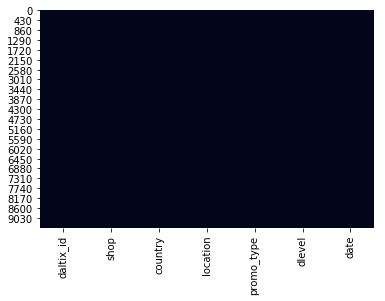

In [35]:
#Checking null values since data it seems consistent
sns.heatmap(promo.isnull(), cbar=False)

In [41]:
# Setting date in the correct format
promo["date_2"] = pd.to_datetime(promo["date"],format = '%Y-%m-%d')

_____________________
## 2. Explore the dataset

**Requirements:**
Use `pandasql` to query the tables and explore the dataset

**Description**

In this section you are free to explore the data however you like in order get to know your dataset. It's meant to be exploratory and only for you to get familiar with the data.

At the end of this section you should be able to, at least, answer the following questions:
* For which time interval you have prices for?

  **The interval start at 2019-08-01 and finish at 2019-10-15**
   **   **
   
* How many shops are comprised in the dataset?

 **There are 4 shops comprised in the dataset**
  **   **
* How many different products are there per shop in the dataset?
 
 **Shop1 1896 **
 
 **Shop2 6 **
 
 **Shop3 807 **
 
 **Shop4 1369**
 ** **
* Can a product have more than 1 active promotion at the same time? 

    ** Yes, there are cases that 1 product has and active promotio at the same time.
    Example: Domaine Royal Jarras Bio Camargue at 2019-08-28

You are free (and __encouraged__) to further describe the dataset as you see fit.

In [22]:
# Check price data frame to find time interval
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
min_date = pysqldf("SELECT MIN(date_2) FROM price;")

In [547]:
max_date = pysqldf("SELECT MAX(date_2) FROM price;")

In [557]:
min_date

,MIN(date)
0,2019-08-01


In [558]:
max_date

,MAX(date)
0,2019-10-15


In [559]:
# Check price data frame to find how many shops are in the dataset
count_shops = pysqldf("SELECT COUNT(distinct shop) FROM price;")

In [560]:
count_shops

,COUNT(distinct shop)
0,4


In [565]:
# Check how many products are there per shop
count_prod_per_shop = pysqldf("SELECT shop,COUNT(distinct product_id) as qtd_prod FROM product_clean GROUP BY shop;")

In [566]:
count_prod_per_shop

,shop,qtd_prod
0,shop1,1896
1,shop2,6
2,shop3,807
3,shop4,1369


In [47]:
# Creating table to check if there is 1 active promotion at the same time
sql = "SELECT a.daltix_id,a.name, a.ean_clean,a.ean_clean_2,a.shop,b.country,b.promo_type,b.date from product_clean a inner join promo b on a.daltix_id = b.daltix_id;"
# Table that has product and promo using inner join on daltix_id 
product_promo = pysqldf(sql)
product_promo.head()

,daltix_id,name,ean_clean,ean_clean_2,shop,country,promo_type,date
0,01fcc0da0268fab4942bcfe0321de0326c2145cfbdac53...,Kangourou boekentas dino 39cm,None,None,shop4,be,Price cut with MinAmount Condition,2019-08-06
1,01fcc0da0268fab4942bcfe0321de0326c2145cfbdac53...,Kangourou boekentas dino 39cm,None,None,shop4,be,Price cut with MinAmount Condition,2019-08-08
2,01fcc0da0268fab4942bcfe0321de0326c2145cfbdac53...,Kangourou boekentas dino 39cm,None,None,shop4,be,Price cut with MinAmount Condition,2019-08-09
3,01fcc0da0268fab4942bcfe0321de0326c2145cfbdac53...,Kangourou boekentas dino 39cm,None,None,shop4,be,Price cut with MinAmount Condition,2019-08-10
4,01fcc0da0268fab4942bcfe0321de0326c2145cfbdac53...,Kangourou boekentas dino 39cm,None,None,shop4,be,Price cut with MinAmount Condition,2019-08-11


In [42]:
# Checking if there is a product that have more than 1 active promotion at the same time
sql2 = "SELECT name,date, COUNT(*) FROM product_promo GROUP BY name,date HAVING COUNT(*) > 1 ORDER BY COUNT(*) DESC;"
duplicated_product_promo = pysqldf(sql2)
duplicated_product_promo.head()

,name,date,COUNT(*)
0,Domaine Royal Jarras Bio Camargue,2019-08-28,4
1,Domaine Royal Jarras Bio Camargue,2019-08-29,4
2,Domaine Royal Jarras Bio Camargue,2019-08-30,4
3,Domaine Royal Jarras Bio Camargue,2019-08-31,4
4,Domaine Royal Jarras Bio Camargue,2019-09-01,4


### 2.1 Explore the dataset

Other questions
You are free (and __encouraged__) to further describe the dataset as you see fit.

* Types of promotion and frequency

  **Price cut = 133**
  
  **Price cut with Indication = 16**
  
  **Price cut with MinAmount Condition = 7489**
  
  **Price cut with MinAmount Condition and Indication = 1231**
  
  **Price cut with Multibuy Condition = 235**
  
 **Price cut with Multibuy Condition and Indication = 4**
 
 **Volume Increase = 348**
  
   **   **
* Product that had more promotion in a specific promo_type

  **zonnebril voor kinderen, Price cut with MinAmount Condition	107**

In [49]:
# Check types of promotion
sql3 = "SELECT promo_type,COUNT(*) FROM promo GROUP BY promo_type;"
promo_type_qtd = pysqldf(sql3)
promo_type_qtd

,promo_type,COUNT(*)
0,Price cut,133
1,Price cut with Indication,16
2,Price cut with MinAmount Condition,7489
3,Price cut with MinAmount Condition and Indication,1231
4,Price cut with Multibuy Condition,235
5,Price cut with Multibuy Condition and Indication,4
6,Volume Increase,348


In [54]:
# Check quantity products and promo_type 
sql4 = "SELECT name,promo_type, COUNT(*) FROM product_promo GROUP BY name,promo_type ORDER BY COUNT(*) DESC"
produc_promo_qtd = pysqldf(sql4)
produc_promo_qtd.head()

,name,promo_type,COUNT(*)
0,zonnebril voor kinderen,Price cut with MinAmount Condition,107
1,zonnebril voor volwassenen,Price cut with MinAmount Condition,90
2,LENOR wasverz.ontwakende lente,Price cut with MinAmount Condition,63
3,Grimbergen Blond 12x33cl (9+3 gratis),Volume Increase,61
4,FA dch Hawai/Brazilian,Price cut with MinAmount Condition,59


___________________________
## 3 Transformation & Manipulation

__Description__

In this section you should use the tables provided in the dataset and manipulate them to find valuable business insights.

Some questions you should be able to answer:
* Which shops have a bigger overlap in their assortment?

 **Shop1 has the greatest overlap in it's assortment**
    ** **

* Which shop has the overall cheapest assortment? What about cheapest categories?
 
  **Shop1 has the cheapest assortment it's mean price is 8.52. The cheapest categories are Kruidenierswaren,Conserven en Soepen Kruidenierswaren,Producten and Groenten en fruit**
  
    ** **  
    
* Which shop is the "_king_" of promotions?

 **Shop4 is the king of promotions with 6806 obs.**
 
   ** **
* Where would you do your shopping? When? Why?

 **To decide where I should buy I will use some criteria**
 
  **Which shop has more products ? From previous analysis we know that shop1 has 1896 products**
  
   **Which shop has the lowest prices ? From previous analysis we know that shop1's mean price is the lowest**
   
   **Also I would do my shopping between 2019-08-08 and 2019-08-13, as the mean price is lowest for shop1**
   
   ** Therefore I would do my shopping in shop1, between 2019-08-08 and 2019-08-13**

** **
* Can you spot any weird price behaviour? 

 **Yes, there is a weird behaviour in the prices.Grouping the prices by data and calculting the mean price per day it's possible     to see that we have peaks on 30th Sep, 9th Ago and 14th Ago and 18th Sep**
 
The questions above are just some example questions. You should provide any insights you find useful/relevant.

_Note:_
* Use this section as a prepation for the next!

In [138]:
# Checking overlap assortment
product_category = pd.merge(left=product_clean,right=category_clean,left_on="daltix_id",right_on="daltix_id")
product_category.groupby(["shop_x"]).count()

,daltix_id,product_id,article_nr,country_x,name,brand,ean_clean,ean_clean_2,contents_clean,contents_clean_2,contents_clean_3,shop_y,country_y,category_clean,category_clean_2,category_clean_3,category_clean_4
shop_x,,,,,,,,,,,,,,,,,
shop1,2025,2025,0,2025,2025,743,0,0,2025,2025,2025,2025,2025,2025,0,0,0
shop2,4,4,1,4,4,4,4,0,4,4,4,4,4,4,0,0,0
shop3,599,599,599,599,599,555,304,34,599,599,599,599,599,599,224,52,28
shop4,771,771,771,771,771,699,345,39,771,771,771,771,771,771,332,56,34


In [23]:
# Checking the cheapest shop 
price[["shop","price"]].groupby(["shop"]).mean()

,price
shop,
shop1,8.527284
shop2,33.210920
shop3,14.032706
shop4,18.113205


In [44]:
# Checking the cheapest category

# Let's join price and cateory
price_category = pd.merge(left=price,right=category_clean,left_on="daltix_id",right_on="daltix_id")

# Calculating mean price of category
category_mean = price_category[["category_clean","price"]].groupby(["category_clean"]).mean()
category_mean.sort_values(by="price").head()

,price
category_clean,
Kruidenierswaren,4.972248
Conserven en Soepen,5.882636
Kruidenierswaren,6.100689
Producten,6.576255
Groenten en fruit,6.967963


In [25]:
# Checking which shops has more promotions
promo.groupby(["shop"]).count()

,daltix_id,country,location,promo_type,dlevel,date
shop,,,,,,
shop2,112,112,112,112,112,112
shop3,2538,2538,2538,2538,2538,2538
shop4,6806,6806,6806,6806,6806,6806


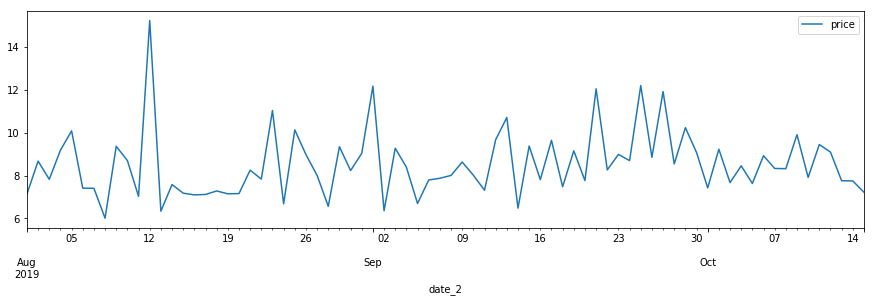

In [36]:
# To decide where I should buy I will use some criteria
# Which shop has more products ? From previous analysis we know that shop1 has 1896 products

# Which shop has the lowest prices ? From previous analysis we know that shop1's mean price is the lowest

# Now lets's check if the shop1 price has any variance along the time

price_shop_1 = price[price["shop"]=="shop1"]
price_shop_1_mean = price_shop_1[["price","date_2"]].groupby(["date_2"]).mean()
price_shop_1_mean.plot(figsize=(15,4));

In [37]:
# As we can see in the graph above there is a variance along the time. Let's check when the mean price is low
price_shop_1_mean.sort_values(by="price").head()

,price
date_2,
2019-08-08,6.012050
2019-08-13,6.339266
2019-09-02,6.359220
2019-09-14,6.481718
2019-08-28,6.567708


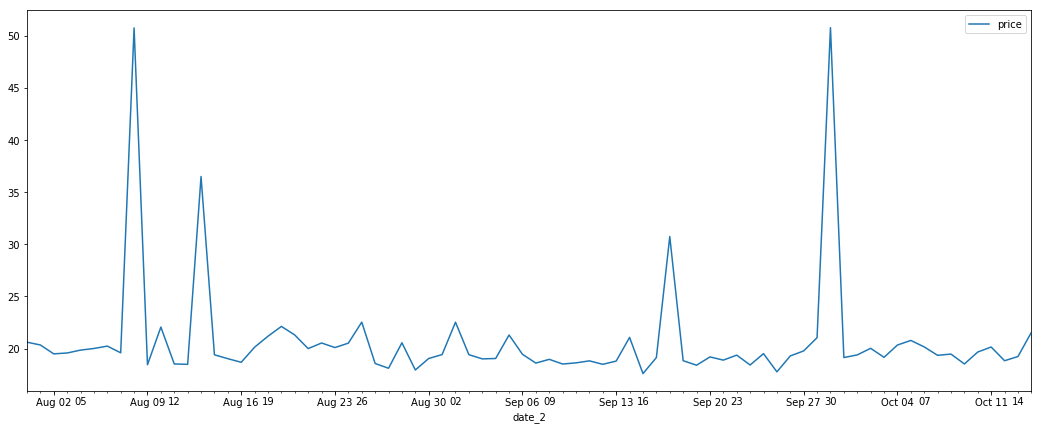

In [38]:
# Grouping the prices data and calculting the mean_price per day it's possible to see that we have peaks on 30th Sep, 9th Ago and
# 14th Ago and 18th Sep

price_grp = price[["price","date_2"]].groupby(["date_2"]).mean().reset_index()
price_grp.set_index('date_2',inplace=True)


fig, ax = plt.subplots(figsize=(18,7))
price_grp.plot(ax=ax)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [39]:
# There are the peaks of price
price_grp.sort_values(by="price",ascending=False).head()

,price
date_2,
2019-09-30,50.798418
2019-08-09,50.774090
2019-08-14,36.513319
2019-09-18,30.753975
2019-08-26,22.536647


#### I would like to know where the shops are located. I could see that be has 4 shops and nl 1 shop.

In [123]:
# Checking where shops are located.
price.groupby(["country","location","shop"]).count()

daltix_id  product_id    price  unit_std     date  \
country location shop                                                       
be      ans      shop3    1128330     1128330  1128330   1128319  1128330   
                 shop4    1590927     1590927  1590927   1590908  1590927   
        be       shop1     195945      195945   195945    195944   195945   
                 shop2    2354215     2354215  2354215   2354190  2354215   
        ledeberg shop3    1137618     1137618  1137618   1137608  1137618   
                 shop4    1621113     1621113  1621113   1621100  1621113   
nl      nl       shop1     220341      220341   220341    220338   220341   

                         date_2  
country location shop            
be      ans      shop3  1128330  
                 shop4  1590927  
        be       shop1   195945  
                 shop2  2354215  
        ledeberg shop3  1137618  
                 shop4  1621113  
nl      nl       shop1   220341

___________________
## 4. Visualization

__Description__

Imagine you are presenting the insights you found to your team, which include fellow data analysts, data scientists and business colleagues.

Present your findings on the insights you've discovered so far. 

#### We can see a drop in promotions through time as we can see in the plot bellow



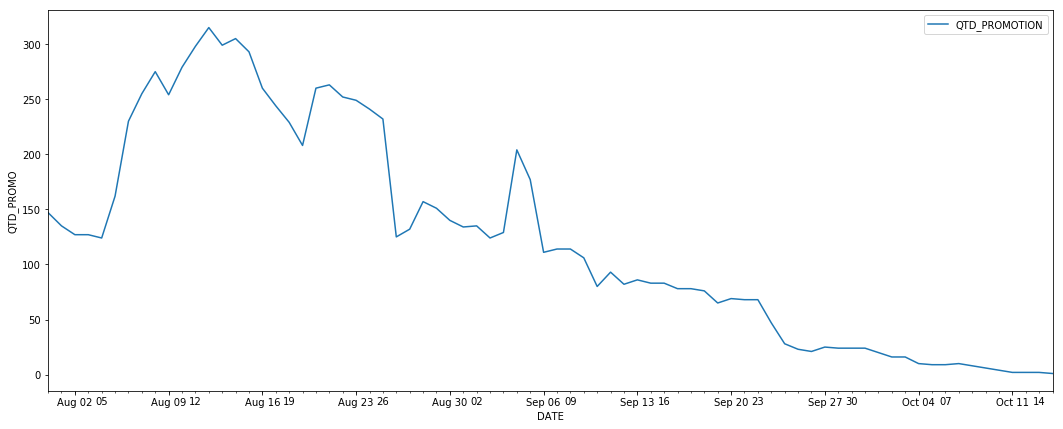

In [42]:
promo_time = promo[["promo_type","date_2"]].groupby("date_2").count()

fig, ax = plt.subplots(figsize=(18,7))
promo_time.plot(ax=ax)

ax.set_xlabel('DATE')
ax.set_ylabel('QTD_PROMO')
ax.tick_params(axis='y')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(["QTD_PROMOTION"]);

#### We can see that there are great diference in price categories in the plot bellow and also that we have 35 categories

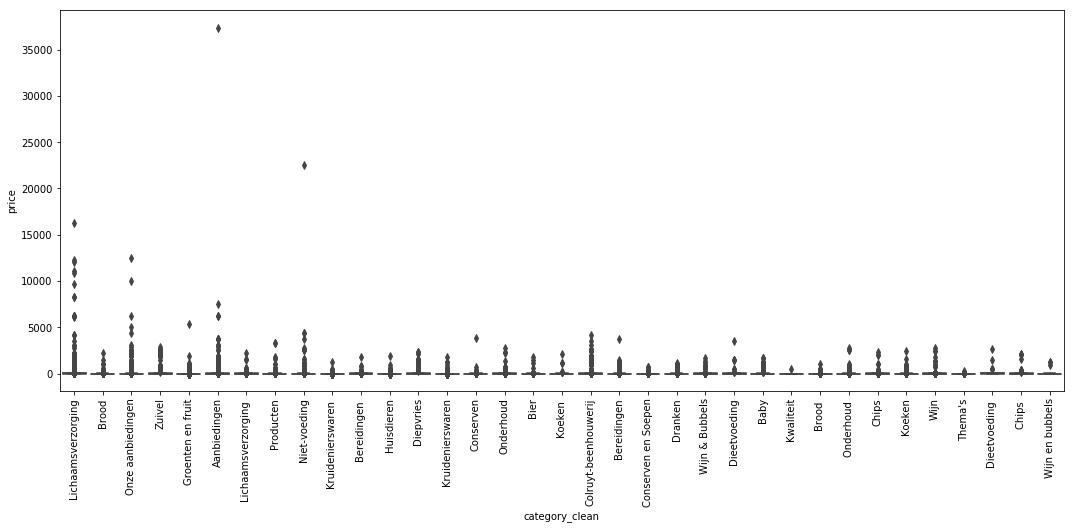

In [116]:
# There are price outliter in some categories
fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="category_clean", y="price", data = price_category)
plt.xticks(rotation=90);

#### Shop2 has the greatest variance in it's category compared with other shops as we can see bellow

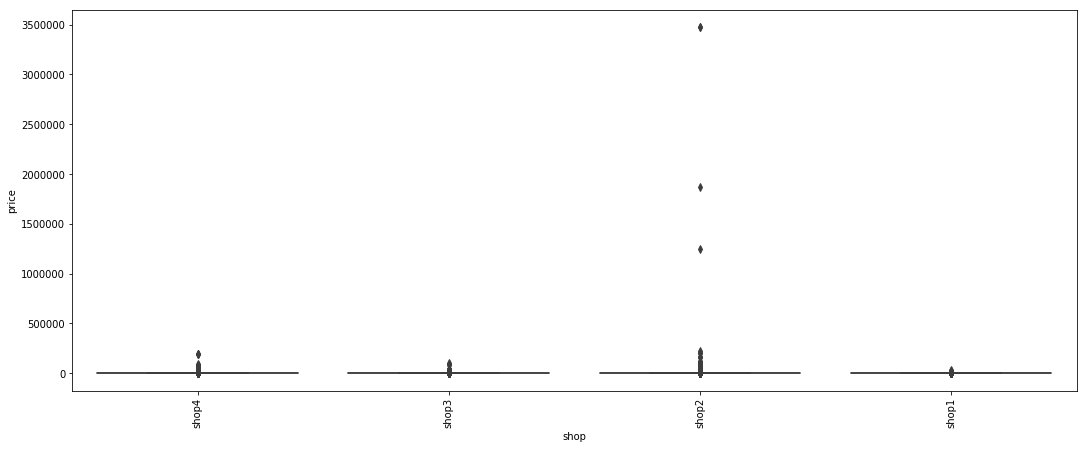

In [127]:
# Check price variance in shops through category
fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="shop", y="price", data = price)
plt.xticks(rotation=90);

#### We can see that shop1 has 5 categories with price in theirs assortment

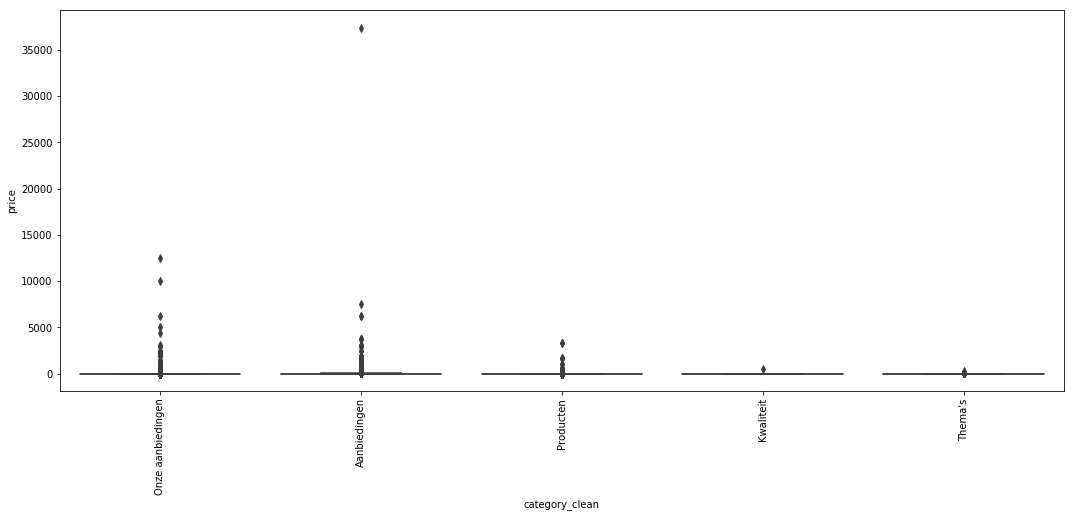

In [108]:
price_category_sh1 = price_category[price_category["shop_x"]=="shop1"]

fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="category_clean", y="price", data = price_category_sh1)
plt.xticks(rotation=90);

####  We can see that shop2 has just two categories with in theirs assortment

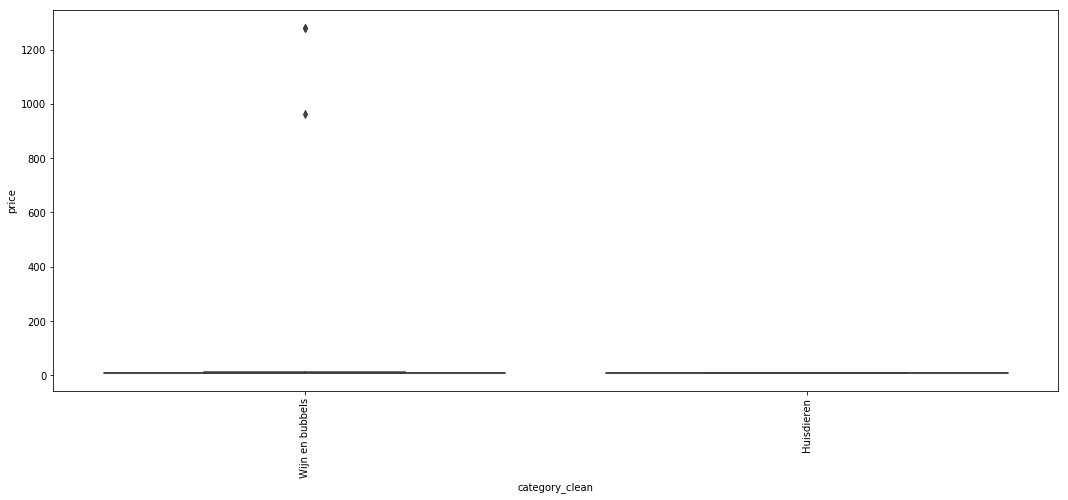

In [111]:
price_category_sh2 = price_category[price_category["shop_x"]=="shop2"]

fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="category_clean", y="price", data = price_category_sh2)
plt.xticks(rotation=90);

####  Shop3 has 19 categories in it's assortment

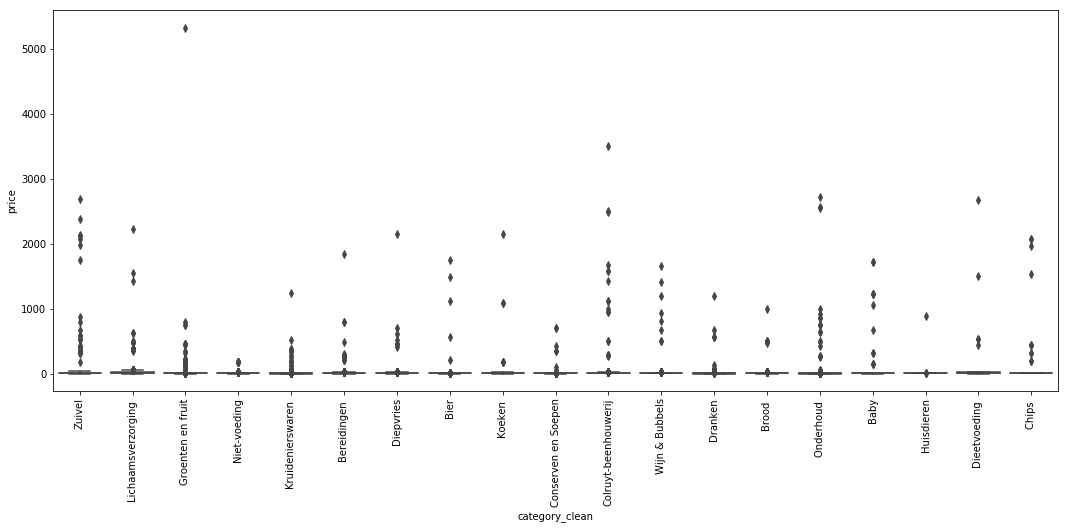

In [114]:
price_category_sh3 = price_category[price_category["shop_x"]=="shop3"]

fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="category_clean", y="price", data = price_category_sh3)
plt.xticks(rotation=90);

#### Shop4 has 18 categories with price in it's assorment

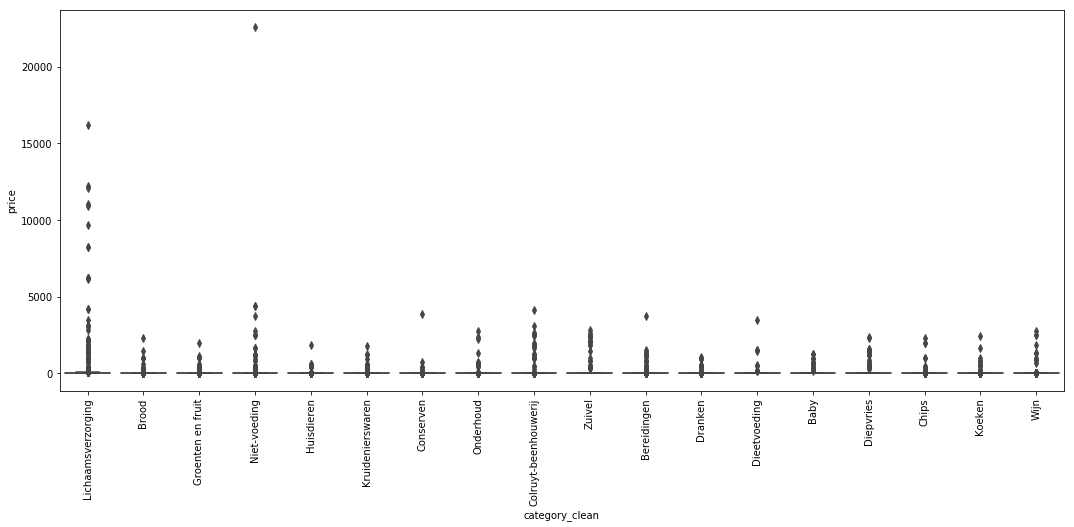

In [120]:

price_category_sh4 = price_category[price_category["shop_x"]=="shop4"]

fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x="category_clean", y="price", data = price_category_sh4)
plt.xticks(rotation=90);

#### Ploting Quantity Promotions and Mean Price  through time

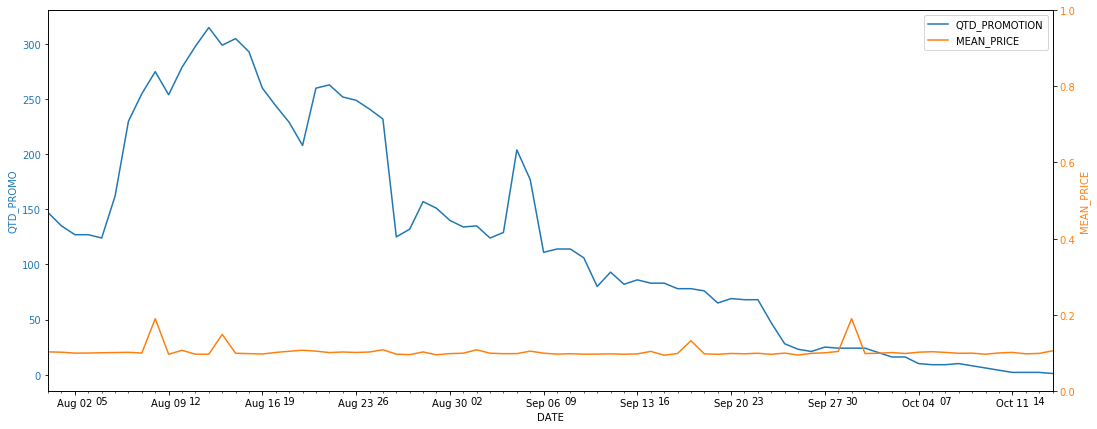

In [76]:
promo_time = promo[["promo_type","date_2"]].groupby("date_2").count()

fig, ax = plt.subplots(figsize=(18,7))
promo_time.plot(ax=ax)
price_grp.plot(ax=ax)

color = 'tab:blue'
ax.set_xlabel('DATE')
ax.set_ylabel('QTD_PROMO', color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'tab:orange'
ax2.set_ylabel('MEAN_PRICE', color=color)
ax2.tick_params(axis='y', labelcolor=color)


#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(["QTD_PROMOTION","MEAN_PRICE"]);


___________________
## 5. Discussion

__Description__

Take some time to prepare some up-coming questions!

* If given more time, how would you further refine your analysis? 
* What other information would you like to have to provide more valuable insigths?

#### ANSWER HERE
If given more time I would like to explore correlation between variables trying to identify for example:

* If there is correlation between price and promo or price and country
* If there is correlation betwen price and category through time

I also would explore more why promo quantity are dropping. Is there any category or type of promo that is more relevant?
As country and location information were given, would be interesting find if there are some category or product that have competitive prices due location. Other interesting analyze would be find if categories have 


Other information that would bring valuable insights are the shop's revenues since we could understand if there is a relationship bewteen competitor's price and sales. Also demographic information where the shops are located could be interesting. We could use this data to find for example if there is a relationship between education and the shop's sortment

___________________
## 6. Bonus question

__Description__

You now have access to the nutritional values of some products:
* **nutri_tbl.csv** - https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/nutri.csv

Assuming that you have to consume between 2200 kcal and 2700 kcal per day, build a basket of 15 products for a [ketogenic diet](https://en.wikipedia.org/wiki/Ketogenic_diet). Where can we buy that basket for the cheapest price? 

__IMPORTANT__:
This is an extra question that you should only focus one if you have time. 
We will only consider your answer if you solved all the previous sections.

In [129]:
url_nutri = 'https://daltix-public-interviews.s3-eu-west-1.amazonaws.com/data-analyst-challenge/nutri.csv'

In [224]:
nutri = pd.read_csv(url_nutri,sep=",")

In [225]:
category_new = category["categories"].str.split("\n",n=-1,expand=True)
nutri_new = nutri["nutritional_values"].str.split("\n",n=-1,expand=True)
nutri_type = nutri_new[3].str.split('"',n=-1,expand=True)

nutri_type.columns = ['0','1','2']
nutri_type.groupby(['1']).count()

,0,2
1,,
carbohydrates,14439,14439
energy,237,237
fats,6,6
fibers,5,5
polyols,1,1
salt,11,11
sugars,4,4


In [226]:
# Extracting data from Nutri data
nutri["kind"] = nutri_type["1"]
nutri_kl = nutri_new[9].str.split(":",n=-1,expand=True)
nutri["kl"] = nutri_kl[1]

In [227]:
# Filtering nutri data product that are in the ketogenic diet.
nutri = nutri[(nutri['kind']=="fats") | (nutri['kind']=="fibers") | (nutri['kind']=="polyols") | (nutri['kind']=="sugars")]

In [228]:
# Checking data
nutri

,daltix_id,shop,country,nutritional_values,product_id,kind,kl
1383,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"","
1598,ac8c5df260597e5620039efccd3c3e4d3fc48a963ce6bf...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",1701082,fibers,"""g"","
3418,3d1479662067e93bf95c825a1f79ba7cc48c06f3fb0371...,shop3,be,"[\n {\n ""nutrients"": {\n ""sugars"": {\...",3156428,sugars,"""ml"","
3534,cc9c1c5b464eb38a568f1f3cdbb34352bfc891da34afc2...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",29970,fibers,"""g"","
3979,cd72d0ae9bbd42cfe269e45bda222cb7936fcf790cdd3d...,shop2,be,"[\n {\n ""nutrients"": {\n ""fats"": {\n ...",S2018022200031570099,fats,0.01
4370,2a4e59eb6e6c30f6992d7a5b63d4afb63877b2d08b77a8...,shop2,be,"[\n {\n ""nutrients"": {\n ""fats"": {\n ...",S2017042504145890099,fats,0.01
5254,9f6d833f1f04fba7249ee04e292f318ea0e7df621e1ae4...,shop3,be,"[\n {\n ""nutrients"": {\n ""sugars"": {\...",17096,sugars,"""g"","
5983,6ad57fd8f438ac14bd4e2f35bf6f077c34bf21b792537e...,shop2,be,"[\n {\n ""nutrients"": {\n ""fats"": {\n ...",S2016071903660020099,fats,0.01
6271,e8398f63f77d491373cb12a7c0ac0bd1aa1ed0061bd463...,shop2,be,"[\n {\n ""nutrients"": {\n ""fats"": {\n ...",S2018022200031590099,fats,0.01
7514,2cab544d1801b5702e7ce91732f9b20b7ebfd44040267e...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",29972,fibers,"""g"","


In [229]:
# Join the nutri data with price
nutri_price = pd.merge(left=nutri,right=price,left_on="daltix_id",right_on="daltix_id")

In [236]:
# Checking result
nutri_price.head()

,daltix_id,shop_x,country_x,nutritional_values,product_id_x,kind,kl,shop_y,country_y,product_id_y,location,price,unit_std,date,date_2
0,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"",",shop3,be,3136086,ledeberg,7.74,kg,2019-10-04,2019-10-04
1,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"",",shop3,be,3136086,ledeberg,3.25,su,2019-09-12,2019-09-12
2,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"",",shop3,be,3136086,ledeberg,7.65,kg,2019-09-04,2019-09-04
3,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"",",shop3,be,3136086,ans,3.25,su,2019-09-02,2019-09-02
4,3b736ab47212413af6f7d94d9fca365ec221acb68e429f...,shop3,be,"[\n {\n ""nutrients"": {\n ""fibers"": {\...",3136086,fibers,"""g"",",shop3,be,3136086,ledeberg,7.65,kg,2019-08-31,2019-08-31


In [234]:
# Calculating mean price to know where will be cheaper have this diet.
nutri_price[["shop_x","price"]].groupby(["shop_x"]).mean()

,price
shop_x,
shop2,6.806079
shop3,6.646511


### In shop3 you will find the cheapest basket of products for a ketogenic diet. Since the mean price of it's product is lower than shop2